# Домашнее задание 4 - Непараметрические критерии


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

##Задача 1 (5 баллов)




1.   Сгенерить самостоятельно 2 распределения, нормальное с любыми параметрами и размером 1000 и биномиальное с параметрами 1, 0.5 и размером 100\
2.   Для каждого распределения
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
    *   Проверить то что ваши распределения имееют общее распределение с помощью критерия однородности Смирнова
3.   Собрать новую выборку из ваших 2 сгенирированных распределений. Для этого взять случайных 900 элементов из нормального распределения и добавить к ним выборку с биномиальным распределением, чтобы снова получили выборки из 1000 элементов
4.   Для новой "собранной выборки"
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
5.  Из выборки с нормальным распределением получить новую выборку. Сделаем это с помощью "докидывания эффекта". Взять текущую выборку с нормальным распределением и рандомные 500 элементов увеличить на 5%, остальные оставим без изменений
6. Для новой выборки с "докинутым эффектом"
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
    *   Проверить то что ваши распределения(изначальное нормальное из п1 и полученное в п5) имееют общее распределение с помощью критерия однородности Смирнова





















In [17]:
np.random.seed(42)

normal_dist = np.random.normal(loc=5, scale=1.5, size=1000)

binomial_dist = np.random.binomial(n=1, p=0.5, size=100)

In [18]:
def kolmogorov_test(input_data):
    return stats.kstest(input_data, 'norm')

def shapiro_test(input_data):
    return stats.shapiro(input_data)

def smirnov_test(input_data1, input_data2):
    return stats.ks_2samp(input_data1, input_data2)

In [19]:
# Построить Q-Q plot
def plot_qq(input_data, title, subplot = (1, 1, 1), xlim=None, ylim=None):
    plt.subplot(subplot[0], subplot[1], subplot[2])
    stats.probplot(input_data, dist="norm", plot=plt)
    if xlim:
      plt.xlim(xlim)
    if ylim:
      plt.ylim(ylim)
    plt.title(title)

In [20]:
def print_conclusions(ks_normal = None, sw_normal = None, ks_binomial = None, sw_binomial = None, smirnov_result = None, alpha = 0.05):

  if any(value is not None for value in [ks_normal, sw_normal, ks_binomial, sw_binomial, smirnov_result]):
    print(f"Результаты для уровня значимости {alpha}:")

  # Нормальное распределение
  if ks_normal:
    if ks_normal.pvalue > alpha:
        print("Нормальное распределение: Данные соответствуют нормальному распределению по тесту Колмогорова-Смирнова.")
    else:
        print("Нормальное распределение: Данные не соответствуют нормальному распределению по тесту Колмогорова-Смирнова.")

  if sw_normal:
    if sw_normal.pvalue > alpha:
        print("Нормальное распределение: Данные соответствуют нормальному распределению по тесту Шапиро-Уилка.")
    else:
        print("Нормальное распределение: Данные не соответствуют нормальному распределению по тесту Шапиро-Уилка.")

  # Биномиальное распределение
  if ks_binomial:
    if ks_binomial.pvalue > alpha:
        print("Биномиальное распределение: Данные соответствуют нормальному распределению по тесту Колмогорова-Смирнова.")
    else:
        print("Биномиальное распределение: Данные не соответствуют нормальному распределению по тесту Колмогорова-Смирнова.")

  if sw_binomial:
    if sw_binomial.pvalue > alpha:
        print("Биномиальное распределение: Данные соответствуют нормальному распределению по тесту Шапиро-Уилка.")
    else:
        print("Биномиальное распределение: Данные не соответствуют нормальному распределению по тесту Шапиро-Уилка.")

  # Сравнение распределений
  if smirnov_result:
    if smirnov_result.pvalue > alpha:
        print("Сравнение распределений: Данные распределений являются однородными.")
    else:
        print("Сравнение распределений: Данные распределений не являются однородными.")

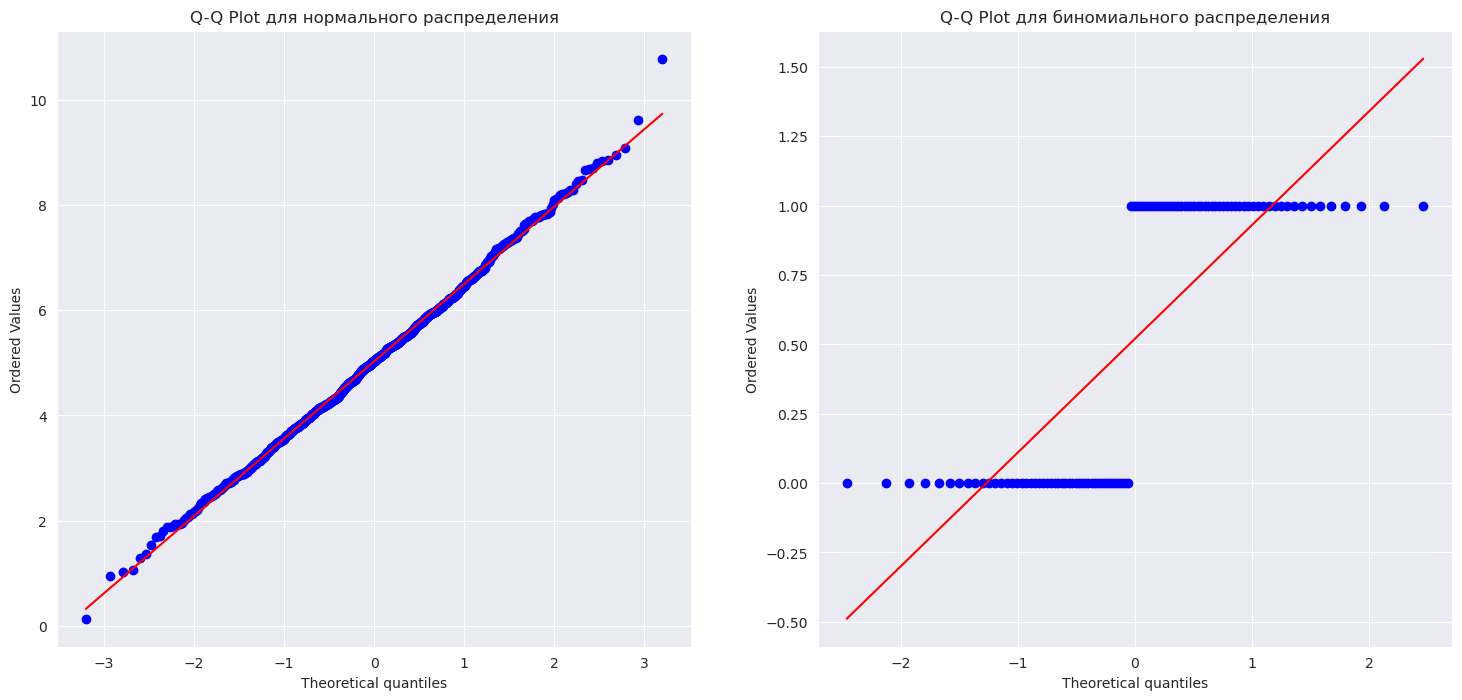

Тест Колмогорова-Смирнова для нормального распределения: KstestResult(statistic=0.9631475401158637, pvalue=0.0, statistic_location=2.331919626643582, statistic_sign=-1)
Тест Колмогорова-Смирнова для биномиального распределения: KstestResult(statistic=0.5, pvalue=1.2131434371817858e-23, statistic_location=0, statistic_sign=-1)
Тест Шапиро-Уилка для нормального распределения: ShapiroResult(statistic=0.9986092190571166, pvalue=0.6272578290249117)
Тест Шапиро-Уилка для биномиального распределения: ShapiroResult(statistic=0.6358192863457472, pvalue=2.1735753688912303e-14)
Тест Смирнова для нормального и биномиального распределений: KstestResult(statistic=0.998, pvalue=7.239801585707932e-141, statistic_location=1.0, statistic_sign=-1)


In [21]:
plt.figure(figsize=(18, 8))
plot_qq(normal_dist, "Q-Q Plot для нормального распределения", subplot=(1, 2, 1))
plot_qq(binomial_dist, "Q-Q Plot для биномиального распределения", subplot=(1, 2, 2))
plt.show()


ks_normal = kolmogorov_test(normal_dist)
ks_binomial = kolmogorov_test(binomial_dist)

print("Тест Колмогорова-Смирнова для нормального распределения:", ks_normal)
print("Тест Колмогорова-Смирнова для биномиального распределения:", ks_binomial)


sw_normal = shapiro_test(normal_dist)
sw_binomial = shapiro_test(binomial_dist)

print("Тест Шапиро-Уилка для нормального распределения:", sw_normal)
print("Тест Шапиро-Уилка для биномиального распределения:", sw_binomial)

smirnov_result = smirnov_test(normal_dist, binomial_dist)
print("Тест Смирнова для нормального и биномиального распределений:", smirnov_result)

In [22]:
alpha = 0.05
print_conclusions(ks_normal, sw_normal, ks_binomial, sw_binomial, smirnov_result, alpha)

Результаты для уровня значимости 0.05:
Нормальное распределение: Данные не соответствуют нормальному распределению по тесту Колмогорова-Смирнова.
Нормальное распределение: Данные соответствуют нормальному распределению по тесту Шапиро-Уилка.
Биномиальное распределение: Данные не соответствуют нормальному распределению по тесту Колмогорова-Смирнова.
Биномиальное распределение: Данные не соответствуют нормальному распределению по тесту Шапиро-Уилка.
Сравнение распределений: Данные распределений не являются однородными.


In [23]:
# 3. Собрать новую выборку
np.random.shuffle(normal_dist)
new_sample = np.concatenate([normal_dist[:900], binomial_dist])

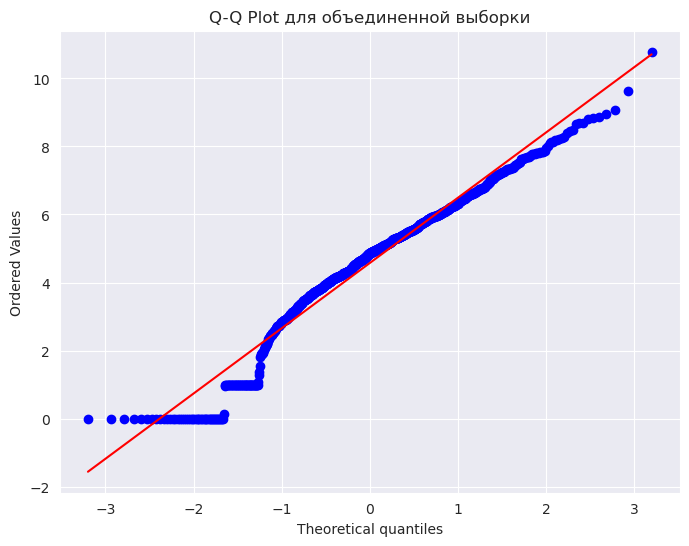

Тест Колмогорова-Смирнова для объединенной выборки: KstestResult(statistic=0.8661475401158637, pvalue=0.0, statistic_location=2.331919626643582, statistic_sign=-1)
Тест Шапиро-Уилка для объединенной выборки: ShapiroResult(statistic=0.9647729992772682, pvalue=8.013361107639357e-15)


In [24]:
# 4. Для новой "собранной выборки"
plt.figure(figsize=(8, 6))
plot_qq(new_sample, "Q-Q Plot для объединенной выборки")
plt.show()

ks_new_sample = kolmogorov_test(new_sample)
print("Тест Колмогорова-Смирнова для объединенной выборки:", ks_new_sample)

sw_new_sample = shapiro_test(new_sample)
print("Тест Шапиро-Уилка для объединенной выборки:", sw_new_sample)

In [25]:
print_conclusions(ks_normal=ks_new_sample, sw_normal=sw_new_sample, alpha=0.05)

Результаты для уровня значимости 0.05:
Нормальное распределение: Данные не соответствуют нормальному распределению по тесту Колмогорова-Смирнова.
Нормальное распределение: Данные не соответствуют нормальному распределению по тесту Шапиро-Уилка.


In [26]:
# 5. Получить новую выборку с "докинутым эффектом"
np.random.shuffle(normal_dist)
effect_indices = np.random.choice(1000, 500, replace=False)
effect_sample = normal_dist.copy()
effect_sample[effect_indices] *= 1.05

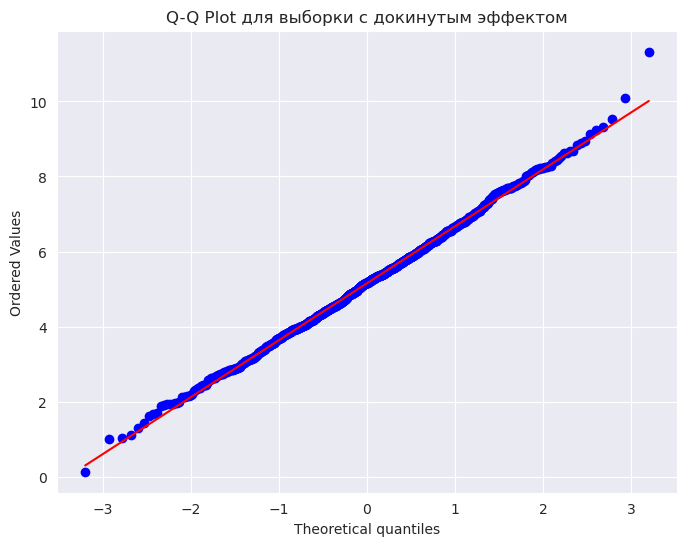

Тест Колмогорова-Смирнова для выборки с докинутым эффектом: KstestResult(statistic=0.9659792157884265, pvalue=0.0, statistic_location=2.1195789595035937, statistic_sign=-1)
Тест Шапиро-Уилка для выборки с докинутым эффектом: ShapiroResult(statistic=0.9983120105036644, pvalue=0.43840457704610736)
Тест Смирнова для исходного нормального и выборки с докинутым эффектом: KstestResult(statistic=0.044, pvalue=0.28779764348473313, statistic_location=5.130570602357257, statistic_sign=1)


In [27]:
# 6. Для новой выборки с "докинутым эффектом"
plt.figure(figsize=(8, 6))
plot_qq(effect_sample, "Q-Q Plot для выборки с докинутым эффектом")
plt.show()

ks_effect_sample = kolmogorov_test(effect_sample)
print("Тест Колмогорова-Смирнова для выборки с докинутым эффектом:", ks_effect_sample)

sw_effect_sample = shapiro_test(effect_sample)
print("Тест Шапиро-Уилка для выборки с докинутым эффектом:", sw_effect_sample)

smirnov_effect_sample = smirnov_test(normal_dist, effect_sample)
print("Тест Смирнова для исходного нормального и выборки с докинутым эффектом:", smirnov_effect_sample)

In [28]:
print_conclusions(ks_normal=ks_effect_sample, sw_normal=sw_effect_sample, smirnov_result=smirnov_effect_sample, alpha=0.05)

Результаты для уровня значимости 0.05:
Нормальное распределение: Данные не соответствуют нормальному распределению по тесту Колмогорова-Смирнова.
Нормальное распределение: Данные соответствуют нормальному распределению по тесту Шапиро-Уилка.
Сравнение распределений: Данные распределений являются однородными.


## Задача 2 (4 балла)

Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Проверьте нормальность этих данных с помощью:
  * Q-Q plot
  * Критерия Колмогорова
  * Критерия Шапиро-Уилка


In [29]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/employees.xls >> employees.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26624  100 26624    0     0  37727      0 --:--:-- --:--:-- --:--:-- 37711


In [30]:
df = pd.read_excel('employees.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    object
 1   GENDER      100 non-null    object
 2   DEPART      100 non-null    object
 3   EDUC        100 non-null    object
 4   AGE         100 non-null    int64 
 5   HEIGHT      100 non-null    int64 
 6   SENIOR      100 non-null    int64 
 7   SALARY      100 non-null    int64 
 8   INI_PROF    100 non-null    int64 
 9   CUR_PROF    100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [31]:
df.head()

,Unnamed: 0,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
0,Alexander,Female,Ship,College,22,63,4,23400,82,90
1,Arcones,Male,Package,College,49,65,17,40400,89,123
2,Barber,Male,Bake,College,36,67,8,29400,77,93
3,Barrera,Male,Package,HS,37,67,3,24800,102,108
4,Bester,Male,Ship,Grad,43,66,11,31200,82,104


In [32]:
df.describe()

,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,30.830000,66.210000,3.760000,24522.000000,99.470000,106.950000
std,7.150694,2.786312,3.928965,5105.801414,14.438623,15.828867
min,18.000000,60.000000,0.000000,16000.000000,66.000000,68.000000
25%,26.000000,64.000000,1.000000,21025.000000,89.000000,94.000000
50%,29.000000,67.000000,3.000000,23650.000000,98.000000,106.000000
75%,35.250000,68.000000,5.000000,26225.000000,108.250000,117.250000
max,54.000000,73.000000,17.000000,42400.000000,137.000000,142.000000


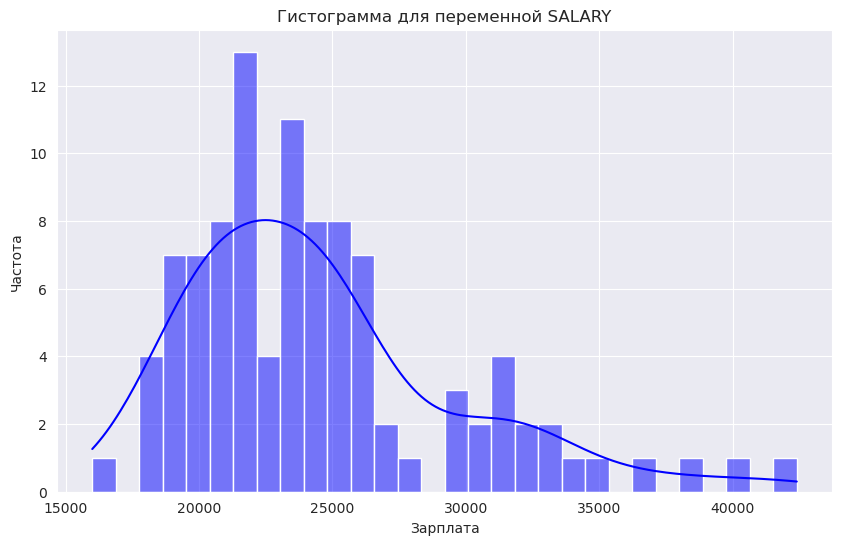

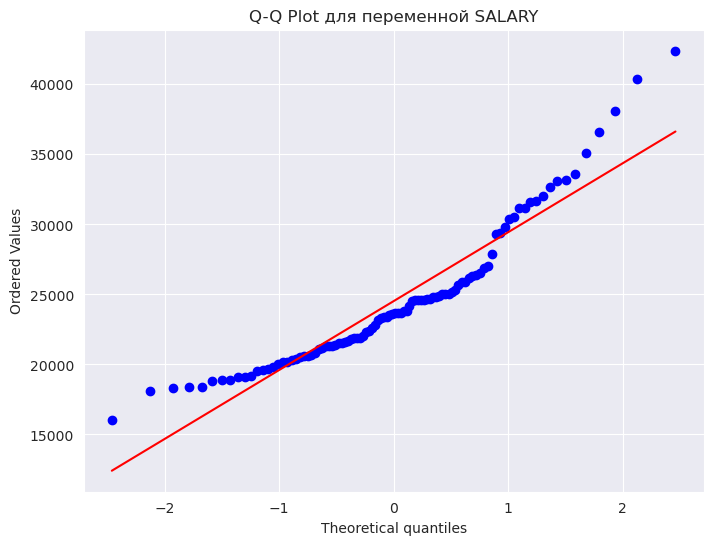

Тест Колмогорова-Смирнова для переменной SALARY: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=16000, statistic_sign=-1)
Тест Шапиро-Уилка для переменной SALARY: ShapiroResult(statistic=0.9015022004875934, pvalue=1.664645028598051e-06)


In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], bins=30, kde=True, color='blue')
plt.title('Гистограмма для переменной SALARY')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(8, 6))
plot_qq(df['SALARY'], "Q-Q Plot для переменной SALARY")
plt.show()


ks_test = kolmogorov_test(df['SALARY'])
print("Тест Колмогорова-Смирнова для переменной SALARY:", ks_test)

sw_test = shapiro_test(df['SALARY'])
print("Тест Шапиро-Уилка для переменной SALARY:", sw_test)

In [34]:
print_conclusions(ks_normal=ks_test, sw_normal=sw_test, alpha=0.05)

Результаты для уровня значимости 0.05:
Нормальное распределение: Данные не соответствуют нормальному распределению по тесту Колмогорова-Смирнова.
Нормальное распределение: Данные не соответствуют нормальному распределению по тесту Шапиро-Уилка.


## Задача 3 (3 балла)

Для данных из файла employees.xls проверить с помощью критерия знаков и рангового критерия гипотезу что медианная зарплата равна 25000

In [35]:
def sign_test(input_data, hypothesized_median):
    # Вычисляем разницу между элементами выборки и гипотетической медианой
    differences = input_data - hypothesized_median

    # Считаем количество положительных и отрицательных разностей
    positive_count = np.sum(differences > 0)
    negative_count = np.sum(differences < 0)

    # Общее количество неравных нулю разностей
    n = positive_count + negative_count

    # Вычисляем p-value для двустороннего теста
    p_value = 2 * min(stats.binom.cdf(min(positive_count, negative_count), n, 0.5),
                      1 - stats.binom.cdf(min(positive_count, negative_count), n, 0.5))

    return p_value


In [36]:
salary = df['SALARY']

hypothetical_median = 25000

# Проверка с помощью критерия знаков
p_value = sign_test(salary, hypothetical_median)
print("Результат критерия знаков:", p_value)

# Проверка с помощью рангового критерия Уилкоксона
wilcoxon_test_result = stats.wilcoxon(salary - hypothetical_median)
print("Результат рангового критерия Уилкоксона:", wilcoxon_test_result)

Результат критерия знаков: 0.000490157948963301
Результат рангового критерия Уилкоксона: WilcoxonResult(statistic=1809.5, pvalue=0.04131952571720401)


In [37]:
# Выводы
alpha = 0.05

if p_value > alpha:
    print("Критерий знаков: Нет оснований отвергнуть гипотезу о том, что медианная зарплата равна 25000.")
else:
    print("Критерий знаков: Гипотеза о том, что медианная зарплата равна 25000, отвергается.")

if wilcoxon_test_result.pvalue > alpha:
    print("Ранговый критерий Уилкоксона: Нет оснований отвергнуть гипотезу о том, что медианная зарплата равна 25000.")
else:
    print("Ранговый критерий Уилкоксона: Гипотеза о том, что медианная зарплата равна 25000, отвергается.")

Критерий знаков: Гипотеза о том, что медианная зарплата равна 25000, отвергается.
Ранговый критерий Уилкоксона: Гипотеза о том, что медианная зарплата равна 25000, отвергается.


## Задача 4 (3 балла)

В файле anorexia.txt записан вес пациентов до и после начала терапии от анорексии. С помощью критерия знаков и рангового критерия проверить, была ли эффективна данная терапия

In [38]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/anorexia.txt >> anorexia.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   355  100   355    0     0    422      0 --:--:-- --:--:-- --:--:--   422


In [39]:
df = pd.read_csv('anorexia.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Before  29 non-null     float64
 1   After   29 non-null     float64
dtypes: float64(2)
memory usage: 596.0 bytes


In [40]:
df.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


In [41]:
df.describe()

,Before,After
count,29.000000,29.000000
mean,82.689655,85.696552
std,4.845495,8.351924
min,70.000000,71.300000
25%,80.400000,81.900000
50%,82.600000,83.900000
75%,85.000000,90.900000
max,94.900000,103.600000


In [42]:
df['Difference'] = df['After'] - df['Before']

positive_count = (df['Difference'] > 0).sum()
negative_count = (df['Difference'] < 0).sum()

p_value_sign = stats.binomtest(positive_count, n=positive_count + negative_count, p=0.5).pvalue

print(f"Критерий знаков: p-value = {p_value_sign}")

stat, p_value_wilcoxon = stats.wilcoxon(df['Before'], df['After'])

print(f"Ранговый критерий Уилкоксона: статистика = {stat}, p-value = {p_value_wilcoxon}")

Критерий знаков: p-value = 0.26493089646101
Ранговый критерий Уилкоксона: статистика = 131.5, p-value = 0.06551516801118851


In [43]:
alpha = 0.05
# Выводы для критерия знаков
if p_value_sign < alpha:
    print("Критерий знаков: Терапия была эффективна (отвергаем H0)")
else:
    print("Критерий знаков: Нет достаточных доказательств, что терапия была эффективна (не отвергаем H0)")

# Выводы для рангового критерия Уилкоксона
if p_value_wilcoxon < alpha:
    print("Ранговый критерий Уилкоксона: Терапия была эффективна (отвергаем H0)")
else:
    print("Ранговый критерий Уилкоксона: Нет достаточных доказательств, что терапия была эффективна (не отвергаем H0)")

Критерий знаков: Нет достаточных доказательств, что терапия была эффективна (не отвергаем H0)
Ранговый критерий Уилкоксона: Нет достаточных доказательств, что терапия была эффективна (не отвергаем H0)


## Задача 5 (3 балла)

В файле seattle.txt записаны цены на объекты недвижимости в одном районе из районов Сиетла в 2001 и 2002 году (объекты выбирались случайно). Изменились ли средние цены в этом районе за год? Проверить это с помощью рангового критерия

In [44]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/seattle.txt >> seattle.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   996  100   996    0     0   1198      0 --:--:-- --:--:-- --:--:--  1197


In [45]:
df = pd.read_csv('seattle.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
 1   Year    100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [46]:
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [47]:
df.describe()

,Price,Year
count,100.00000,100.000000
mean,309.09184,2001.500000
std,249.83113,0.502519
min,50.00000,2001.000000
25%,178.60000,2001.000000
50%,248.95000,2001.500000
75%,337.75000,2002.000000
max,1850.00000,2002.000000


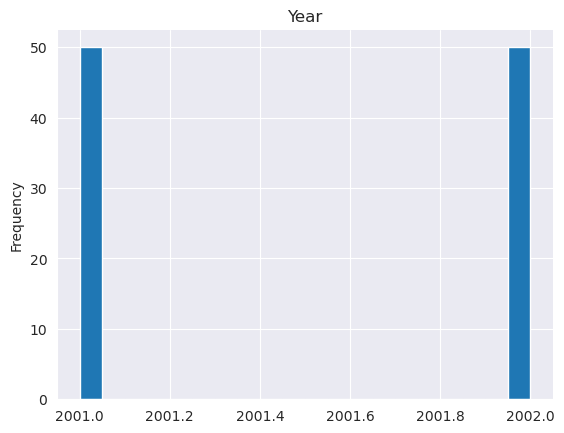

In [48]:
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

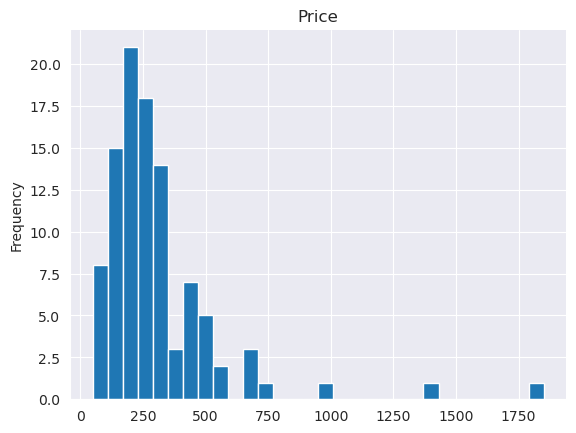

In [49]:
df['Price'].plot(kind='hist', bins=30, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [50]:
prices_2001 = df[df['Year'] == 2001]['Price'].reset_index(drop=True)
prices_2002 = df[df['Year'] == 2002]['Price'].reset_index(drop=True)

if len(prices_2001) != len(prices_2002):
    raise ValueError("Некоторые данные отсутствуют.")

statistic_whitneyu, p_value_whitneyu = stats.mannwhitneyu(prices_2001, prices_2002, alternative='greater')

print(f"Ранговый критерий Манна-Уитни: статистика = {statistic_whitneyu}, p-value = {p_value_whitneyu}")

Ранговый критерий Манна-Уитни: статистика = 1295.5, p-value = 0.3781936337850874


In [51]:
if p_value_wilcoxon < alpha:
    print("Ранговый критерий Манна-Уитни: Средние цены изменились.")
else:
    print("Ранговый критерий Манна-Уитни: Средние цены не изменились.")

Ранговый критерий Манна-Уитни: Средние цены не изменились.


## Задача 6 (3 балла)

В рамках исследования эффективности лекарства
пациенты с синдромом дефицита внимания и гиперактивностью в течение недели принимали либо лекарство, либо плацебо. В конце недели каждый пациент проходил тест на способность к подавлению импульсивных поведенческих реакций. Был ли эффект от применения лекарства? Данные находятся в файле methylphenidate.txt.

In [52]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/methylphenidate.txt >> methylphenidate.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   168  100   168    0     0    210      0 --:--:-- --:--:-- --:--:--   210


In [53]:
df = pd.read_csv('methylphenidate.txt', sep=' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Placebo          24 non-null     int64
 1   Methylphenidate  24 non-null     int64
dtypes: int64(2)
memory usage: 516.0 bytes


In [54]:
df.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [55]:
df.describe()

,Placebo,Methylphenidate
count,24.000000,24.000000
mean,39.750000,44.708333
std,11.314669,12.319935
min,26.000000,29.000000
25%,33.000000,35.000000
50%,36.000000,42.500000
75%,44.500000,52.500000
max,71.000000,77.000000


In [56]:
placebo = df['Placebo']
methylphenidate = df['Methylphenidate']

In [57]:
data = pd.DataFrame({
    'Группа': ['Плацебо'] * len(placebo) + ['Метилфенидат'] * len(methylphenidate),
    'Результат': list(placebo) + list(methylphenidate)
})

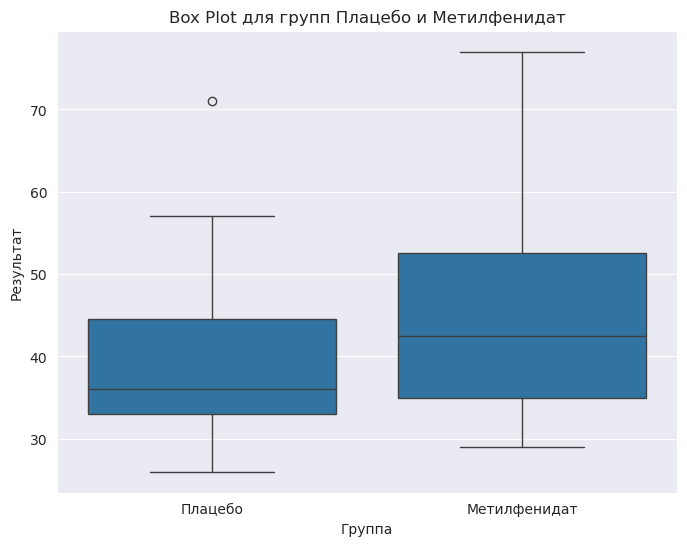

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Группа', y='Результат', data=data)
plt.title('Box Plot для групп Плацебо и Метилфенидат')
plt.xlabel('Группа')
plt.ylabel('Результат')
plt.show()

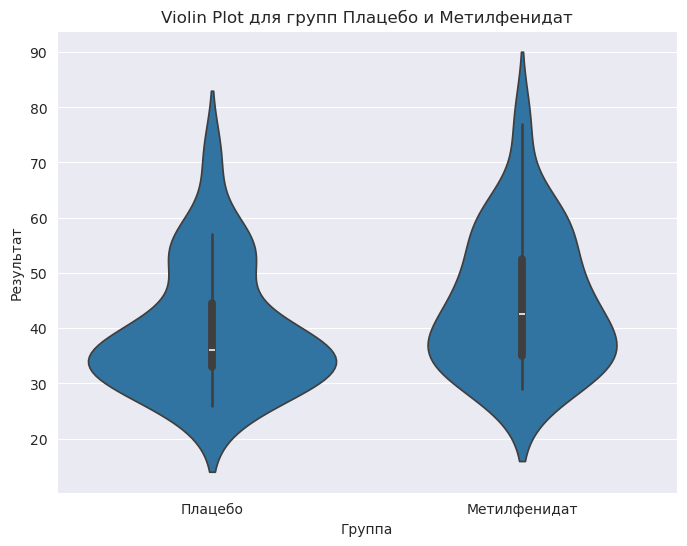

In [59]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Группа', y='Результат', data=data)
plt.title('Violin Plot для групп Плацебо и Метилфенидат')
plt.xlabel('Группа')
plt.ylabel('Результат')
plt.show()

In [60]:
# Проверка нормальности распределения
_, p_value_placebo = stats.shapiro(placebo)
_, p_value_methylphenidate = stats.shapiro(methylphenidate)

print(f"P-value для теста Шапиро-Уилка на нормальность в группе плацебо: {p_value_placebo}")
print(f"P-value для теста Шапиро-Уилка на нормальность в группе лекарства: {p_value_methylphenidate}")

# Проверка равенства дисперсий (тест Левена)
_, p_value_levene = stats.levene(placebo, methylphenidate)
print(f"P-value для теста Левена на равенство дисперсий: {p_value_levene}")

P-value для теста Шапиро-Уилка на нормальность в группе плацебо: 0.0030201670519232563
P-value для теста Шапиро-Уилка на нормальность в группе лекарства: 0.048768141171827664
P-value для теста Левена на равенство дисперсий: 0.40873698568514094


In [61]:
alpha = 0.05
equal_var = None

if p_value_levene > alpha:
    equal_var = True
    print(f"Дисперсии в группах можно считать равными (p > {alpha} для теста Левена).")
else:
    equal_var = False
    print(f"Дисперсии в группах не равны (p <= {alpha} для теста Левена).")

if p_value_placebo > alpha and p_value_methylphenidate > alpha:
    print(f"Данные в обеих группах могут быть нормально распределены (p > {alpha} для теста Шапиро-Уилка).")
else:
    print(f"Данные в одной или обеих группах не являются нормально распределенными (p <= {alpha} для теста Шапиро-Уилка).")

Дисперсии в группах можно считать равными (p > 0.05 для теста Левена).
Данные в одной или обеих группах не являются нормально распределенными (p <= 0.05 для теста Шапиро-Уилка).


In [62]:
# Выполнение t-теста
t_stat, p_value_ttest = stats.ttest_ind(placebo, methylphenidate, equal_var=equal_var)

print(f"T-статистика: {t_stat}")
print(f"P-value для t-теста: {p_value_ttest}")

T-статистика: -1.452163501815909
P-value для t-теста: 0.1532433046938409


In [63]:
if p_value_ttest < alpha:
    print(f"Результаты t-теста статистически значимы (p < {alpha}). Лекарство оказывает эффект.")
else:
    print(f"Результаты t-теста не являются статистически значимыми (p >= {alpha}). Нет достаточных доказательств того, что лекарство оказывает эффект.")

Результаты t-теста не являются статистически значимыми (p >= 0.05). Нет достаточных доказательств того, что лекарство оказывает эффект.


## Задача 7 (2 балла)


1.   Сгенерировать выборки с нормальным распределением без выбросов, докинуть эффект на одну из них равномерно и с помощью распределения
2.   То же, что и в п1, но выборки с выбросами сделать
3.   Для случаев из п1 и п2 бутстрэпом оценить: среднее, медиану, 25% перцентиль, построить доверительные интервалы для статистик (речь о разницах средних/медиан/перцентилей для групп)
4.   Для случаев из п1 и п2 оценить среднее т-тестом и Манном-Уитни. Сравнить с результатами бутстрэпа. Сделать выводы. Сравниваем точечные оценки (на бутстрэпе их тоже считаем)

Примечание:
- Бутстреп считать минимум на 1000 итераций
- Для докидывания эффекта с помощью распределения возьмите распределение из stats, параметры задаются исходя из параметров изначального вектора и желаемого эффекта


In [64]:
n = 1000
mean = 50
std_dev = 10

# Генерация выборок
sample1 = np.random.normal(mean, std_dev, n)
sample2 = np.random.normal(mean, std_dev, n)

# Добавление эффекта на sample2
effect_size = 0.05  # 5% увеличение
effect_indices = np.random.choice(n, 500, replace=False)
sample2[effect_indices] *= (1 + effect_size)

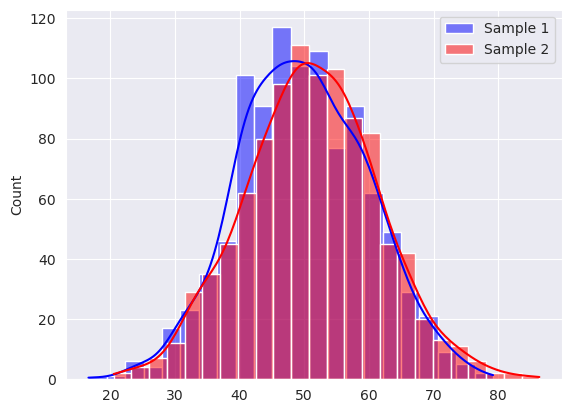

In [65]:
# Визуализация
sns.histplot(sample1, kde=True, color='blue', label='Sample 1')
sns.histplot(sample2, kde=True, color='red', label='Sample 2')
plt.legend()
plt.show()

In [66]:
# Генерация выборок с выбросами
sample1_outliers = np.random.normal(mean, std_dev, n)
sample2_outliers = np.random.normal(mean, std_dev, n)

# Добавление выбросов
sample1_outliers[:50] = np.random.normal(mean + 5 * std_dev, std_dev, 50)
sample2_outliers[:50] = np.random.normal(mean + 5 * std_dev, std_dev, 50)

# Добавление эффекта на sample2_outliers
sample2_outliers[effect_indices] *= (1 + effect_size)

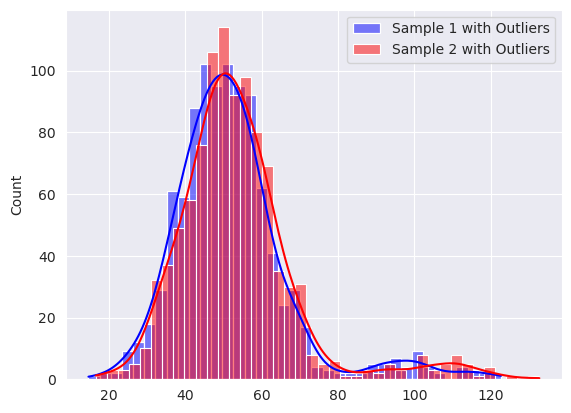

In [67]:
# Визуализация
sns.histplot(sample1_outliers, kde=True, color='blue', label='Sample 1 with Outliers')
sns.histplot(sample2_outliers, kde=True, color='red', label='Sample 2 with Outliers')
plt.legend()
plt.show()

In [68]:
# Бутстрэп для оценки статистик
def bootstrap_stats(sample1, sample2, n_iterations=1000):
    stats = []
    for _ in range(n_iterations):
        boot_sample1 = np.random.choice(sample1, size=len(sample1), replace=True)
        boot_sample2 = np.random.choice(sample2, size=len(sample2), replace=True)
        mean_diff = np.mean(boot_sample2) - np.mean(boot_sample1)
        median_diff = np.median(boot_sample2) - np.median(boot_sample1)
        percentile_diff = np.percentile(boot_sample2, 25) - np.percentile(boot_sample1, 25)
        stats.append((mean_diff, median_diff, percentile_diff))

    stats = np.array(stats)
    mean_diff_ci = np.percentile(stats[:, 0], [2.5, 97.5])
    median_diff_ci = np.percentile(stats[:, 1], [2.5, 97.5])
    percentile_diff_ci = np.percentile(stats[:, 2], [2.5, 97.5])

    return mean_diff_ci, median_diff_ci, percentile_diff_ci

In [69]:
# Бутстрэп для выборок без выбросов
mean_diff_ci, median_diff_ci, percentile_diff_ci = bootstrap_stats(sample1, sample2)
print(f"Mean difference CI: {mean_diff_ci}")
print(f"Median difference CI: {median_diff_ci}")
print(f"25% percentile difference CI: {percentile_diff_ci}")

Mean difference CI: [0.42807164 2.15096848]
Median difference CI: [0.34582784 2.42951384]
25% percentile difference CI: [0.34040503 2.90193338]


In [70]:
# Бутстрэп для выборок с выбросами
mean_diff_ci_outliers, median_diff_ci_outliers, percentile_diff_ci_outliers = bootstrap_stats(sample1_outliers, sample2_outliers)
print(f"Mean difference CI with outliers: {mean_diff_ci_outliers}")
print(f"Median difference CI with outliers: {median_diff_ci_outliers}")
print(f"25% percentile difference CI with outliers: {percentile_diff_ci_outliers}")

Mean difference CI with outliers: [0.38088088 3.05176103]
Median difference CI with outliers: [0.10608415 2.50353768]
25% percentile difference CI with outliers: [0.67427315 3.24419684]


In [71]:
# t-тест для выборок без выбросов
t_stat, p_value = stats.ttest_ind(sample2, sample1)
print(f"t-test: t-statistic = {t_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("При уровне значимости α = 0.05, t-тест для выборок без выбросов позволяет отвергнуть нулевую гипотезу о равенстве средних.")
else:
    print("При уровне значимости α = 0.05, t-тест для выборок без выбросов не позволяет отвергнуть нулевую гипотезу о равенстве средних.")

# Манна-Уитни для выборок без выбросов
u_stat, p_value_mw = stats.mannwhitneyu(sample2, sample1)
print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_value_mw}")
if p_value_mw < 0.05:
    print("При уровне значимости α = 0.05, Манна-Уитни для выборок без выбросов позволяет отвергнуть нулевую гипотезу о равенстве распределений.")
else:
    print("При уровне значимости α = 0.05, Манна-Уитни для выборок без выбросов не позволяет отвергнуть нулевую гипотезу о равенстве распределений.")

t-test: t-statistic = 2.884288435236996, p-value = 0.003965005849460282
При уровне значимости α = 0.05, t-тест для выборок без выбросов позволяет отвергнуть нулевую гипотезу о равенстве средних.
Mann-Whitney U test: U-statistic = 537489.0, p-value = 0.003694638193200081
При уровне значимости α = 0.05, Манна-Уитни для выборок без выбросов позволяет отвергнуть нулевую гипотезу о равенстве распределений.


In [72]:
# t-тест для выборок с выбросами
t_stat_outliers, p_value_outliers = stats.ttest_ind(sample2_outliers, sample1_outliers)
print(f"t-test with outliers: t-statistic = {t_stat_outliers}, p-value = {p_value_outliers}")
if p_value_outliers < 0.05:
    print("При уровне значимости α = 0.05, t-тест для выборок с выбросами позволяет отвергнуть нулевую гипотезу о равенстве средних.")
else:
    print("При уровне значимости α = 0.05, t-тест для выборок с выбросами не позволяет отвергнуть нулевую гипотезу о равенстве средних.")

# Манна-Уитни для выборок с выбросами
u_stat_outliers, p_value_mw_outliers = stats.mannwhitneyu(sample2_outliers, sample1_outliers)
print(f"Mann-Whitney U test with outliers: U-statistic = {u_stat_outliers}, p-value = {p_value_mw_outliers}")
if p_value_mw_outliers < 0.05:
    print("При уровне значимости α = 0.05, Манна-Уитни для выборок с выбросами позволяет отвергнуть нулевую гипотезу о равенстве распределений.")
else:
    print("При уровне значимости α = 0.05, Манна-Уитни для выборок с выбросами не позволяет отвергнуть нулевую гипотезу о равенстве распределений.")

t-test with outliers: t-statistic = 2.3607999444902505, p-value = 0.01833112179393172
При уровне значимости α = 0.05, t-тест для выборок с выбросами позволяет отвергнуть нулевую гипотезу о равенстве средних.
Mann-Whitney U test with outliers: U-statistic = 537628.0, p-value = 0.0035696110593026772
При уровне значимости α = 0.05, Манна-Уитни для выборок с выбросами позволяет отвергнуть нулевую гипотезу о равенстве распределений.


## Задача 8 (2 балла)

Сгенерировать 2 выборки из нормального распределения с 1000 элементов каждая.
- Оцените на этих данных мощность и корректность t-test и Манна-Уитни
- Докиньте выбросы в обе группы и проверьте как изменится мощность и корректность

Для оценки использовать минимум 1000 итераций

In [73]:
# Функция для оценки мощности и корректности
def evaluate_tests(num_iterations, alpha, with_outliers=False):
    t_test_power = 0
    mannwhitney_power = 0
    t_test_correctness = 0
    mannwhitney_correctness = 0

    for _ in range(num_iterations):
        sample1, sample2 = generate_samples(with_outliers)

        t_stat, t_p_value = stats.ttest_ind(sample1, sample2)
        if t_p_value < alpha:
            t_test_power += 1
        if t_p_value >= alpha:
            t_test_correctness += 1

        u_stat, u_p_value = stats.mannwhitneyu(sample1, sample2)
        if u_p_value < alpha:
            mannwhitney_power += 1
        if u_p_value >= alpha:
            mannwhitney_correctness += 1

    t_test_power /= num_iterations
    mannwhitney_power /= num_iterations
    t_test_correctness /= num_iterations
    mannwhitney_correctness /= num_iterations

    return t_test_power, mannwhitney_power, t_test_correctness, mannwhitney_correctness

In [74]:
def generate_samples(with_outliers=False):
    sample1 = np.random.normal(mean, std_dev, n)
    sample2 = np.random.normal(mean, std_dev, n)

    if with_outliers:
        sample1[:50] = np.random.normal(mean + 5 * std_dev, std_dev, 50)
        sample2[:50] = np.random.normal(mean + 5 * std_dev, std_dev, 50)

    return sample1, sample2

In [75]:
n = 1000
mean = 50
std_dev = 10
num_iterations = 1000
alpha = 0.05

t_test_power, mannwhitney_power, t_test_correctness, mannwhitney_correctness = evaluate_tests(num_iterations, alpha)
print(f"Без выбросов:")
print(f"t-test power: {t_test_power:.4f}, t-test correctness: {t_test_correctness:.4f}")
print(f"Mann-Whitney power: {mannwhitney_power:.4f}, Mann-Whitney correctness: {mannwhitney_correctness:.4f}")

Без выбросов:
t-test power: 0.0510, t-test correctness: 0.9490
Mann-Whitney power: 0.0560, Mann-Whitney correctness: 0.9440


In [76]:
if t_test_power > mannwhitney_power:
    print(f"При уровне значимости α = {alpha}, t-test показывает более высокую мощность, чем Mann-Whitney.")
else:
    print(f"При уровне значимости α = {alpha}, Mann-Whitney показывает более высокую мощность, чем t-test.")

if t_test_correctness > mannwhitney_correctness:
    print(f"При уровне значимости α = {alpha}, t-test показывает более высокую корректность, чем Mann-Whitney.")
else:
    print(f"При уровне значимости α = {alpha}, Mann-Whitney показывает более высокую корректность, чем t-test.")

При уровне значимости α = 0.05, Mann-Whitney показывает более высокую мощность, чем t-test.
При уровне значимости α = 0.05, t-test показывает более высокую корректность, чем Mann-Whitney.


In [77]:
t_test_power_outliers, mannwhitney_power_outliers, t_test_correctness_outliers, mannwhitney_correctness_outliers = evaluate_tests(num_iterations, alpha, with_outliers=True)
print(f"С выбросами:")
print(f"t-test power: {t_test_power_outliers:.4f}, t-test correctness: {t_test_correctness_outliers:.4f}")
print(f"Mann-Whitney power: {mannwhitney_power_outliers:.4f}, Mann-Whitney correctness: {mannwhitney_correctness_outliers:.4f}")

С выбросами:
t-test power: 0.0040, t-test correctness: 0.9960
Mann-Whitney power: 0.0270, Mann-Whitney correctness: 0.9730


In [78]:
if t_test_power_outliers > mannwhitney_power_outliers:
    print(f"При уровне значимости α = {alpha}, t-test показывает более высокую мощность, чем Mann-Whitney, даже с выбросами.")
else:
    print(f"При уровне значимости α = {alpha}, Mann-Whitney показывает более высокую мощность, чем t-test, с выбросами.")

if t_test_correctness_outliers > mannwhitney_correctness_outliers:
    print(f"При уровне значимости α = {alpha}, t-test показывает более высокую корректность, чем Mann-Whitney, даже с выбросами.")
else:
    print(f"При уровне значимости α = {alpha}, Mann-Whitney показывает более высокую корректность, чем t-test, с выбросами.")

При уровне значимости α = 0.05, Mann-Whitney показывает более высокую мощность, чем t-test, с выбросами.
При уровне значимости α = 0.05, t-test показывает более высокую корректность, чем Mann-Whitney, даже с выбросами.
